In [311]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


ERROR: scikit-learn 1.1.3 has requirement joblib>=1.0.0, but you'll have joblib 0.16.0 which is incompatible.


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [314]:
pip install delayed

Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import preprocessing
import sklearn
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [2]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y-%d-%m")

## Reading Datasets (Train and Store)

In [3]:
training = pd.read_csv("Z:\\rossmann-store-sales\\train.csv")

C:\Users\soura\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
training.shape

(1017209, 9)

In [5]:
training.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
storeData = pd.read_csv("Z:\\rossmann-store-sales\\store.csv")

In [7]:
storeData.shape

(1115, 10)

In [8]:
storeData.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## Merging of Store and Training Dataset

In [34]:
mergedData = pd.merge(training, storeData, how='left', on='Store')
print(type(mergedData))

<class 'pandas.core.frame.DataFrame'>


In [35]:
mergedData.to_csv('Z:\\MergedTrainingDataset.csv')

In [36]:
mergedData.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
a                            0
b                            0
c                            0
d                            0
Feb,May,Aug,Nov              0
Jan,Apr,Jul,Oct              0
Mar,Jun,Sept,Dec             0
dtype: int64

In [37]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990515 entries, 0 to 990514
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      990515 non-null  int64  
 1   DayOfWeek                  990515 non-null  int64  
 2   Sales                      990515 non-null  int64  
 3   Customers                  990515 non-null  int64  
 4   Open                       990515 non-null  int64  
 5   Promo                      990515 non-null  int64  
 6   StateHoliday               990515 non-null  int64  
 7   SchoolHoliday              990515 non-null  int64  
 8   Year                       990515 non-null  int64  
 9   Month                      990515 non-null  int64  
 10  Day                        990515 non-null  int64  
 11  Assortment                 990515 non-null  int32  
 12  CompetitionDistance        990515 non-null  float64
 13  CompetitionOpenSinceMonth  99

In [38]:
mergedData.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Promo2,Promo2SinceWeek,Promo2SinceYear,a,b,c,d,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,0,1,2015,7,...,0,14.0,2011.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,5,6064,625,1,1,0,1,2015,7,...,1,13.0,2010.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,5,8314,821,1,1,0,1,2015,7,...,1,14.0,2011.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,5,13995,1498,1,1,0,1,2015,7,...,0,14.0,2011.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,5,4822,559,1,1,0,1,2015,7,...,0,14.0,2011.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Eliminating Null values from Store Dataset

In [9]:
storeData.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
storeData.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Checking Column Informations

In [11]:
storeData['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [12]:
storeData['PromoInterval'].mode()[0]

'Jan,Apr,Jul,Oct'

#### Filling up NAN values

In [13]:
storeData['CompetitionDistance'].fillna(storeData['CompetitionDistance'].mean(), inplace = True)

In [19]:
storeData = replaceWithMode(storeData,'Promo2SinceWeek')
storeData = replaceWithMode(storeData,'Promo2SinceYear')
storeData = replaceWithMode(storeData,'CompetitionOpenSinceMonth')
storeData = replaceWithMode(storeData,'CompetitionOpenSinceYear')
storeData = replaceWithMode(storeData,'PromoInterval')

In [20]:
storeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Encoding Categorical Columns

In [21]:
storeData = OneHotEncoding(storeData, 'StoreType')
storeData = LevelEncoding(storeData,'Assortment')
storeData = OneHotEncoding(storeData, 'PromoInterval')

In [22]:
storeData

,Store,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,a,b,c,d,"Feb,May,Aug,Nov","Jan,Apr,Jul,Oct","Mar,Jun,Sept,Dec"
0,1,0,1270.0,9.0,2008.0,0,14.0,2011.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,0,570.0,11.0,2007.0,1,13.0,2010.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0,14130.0,12.0,2006.0,1,14.0,2011.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,2,620.0,9.0,2009.0,0,14.0,2011.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,0,29910.0,4.0,2015.0,0,14.0,2011.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,0,1900.0,6.0,2014.0,1,31.0,2013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1111,1112,2,1880.0,4.0,2006.0,0,14.0,2011.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1112,1113,2,9260.0,9.0,2013.0,0,14.0,2011.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1113,1114,2,870.0,9.0,2013.0,0,14.0,2011.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Preprocessing Training Dataset

In [23]:
training.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [24]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [25]:
training

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [26]:
training['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

#### Encoding StateHoliday

In [27]:
StateHolidayMaps = {'0':0,'a':1,'b':1,'c':1}
training['StateHoliday'].replace(StateHolidayMaps, inplace = True)

## Graphical Analysis

In [28]:
training['Customers'].shape

(1017209,)

#### Removing outliers for Sales

In [29]:
High, low = findOutliers(training,'Sales')
training = training[(training['Sales']< High) & (training['Sales']> low)]
training.shape

(990515, 9)

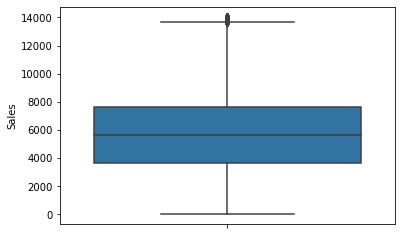

In [30]:
sns.boxplot(x = training['Sales'], orient = 'v')

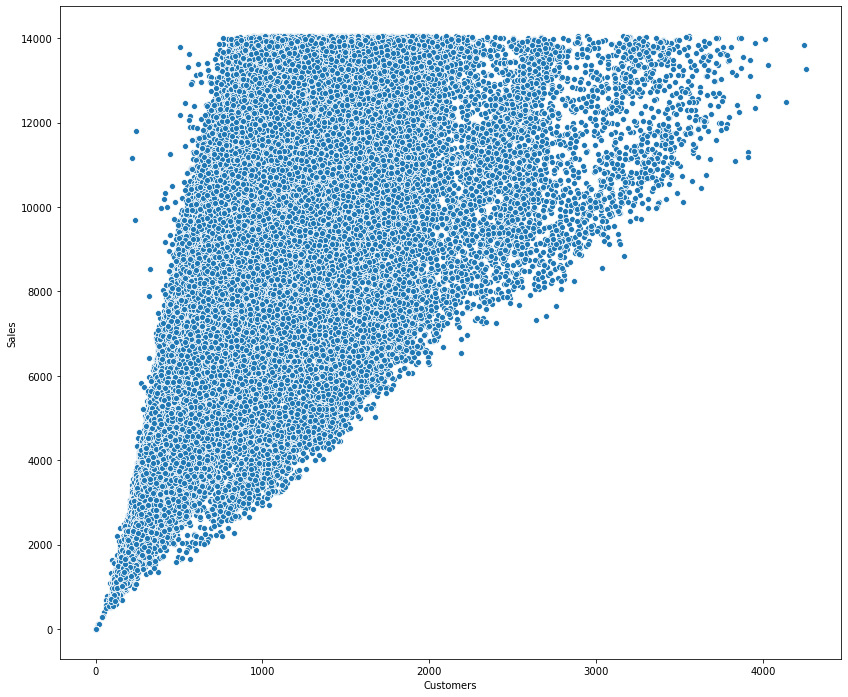

In [31]:
plt.figure(figsize = (14,12))
sns.scatterplot(training['Customers'],training['Sales'])

#### Handling Date Format

In [32]:
training['Year'] = pd.DatetimeIndex(training['Date']).year
training['Month'] = pd.DatetimeIndex(training['Date']).month
training['Day'] = pd.DatetimeIndex(training['Date']).day

<ipython-input-32-2da8a28ee8ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Year'] = pd.DatetimeIndex(training['Date']).year
<ipython-input-32-2da8a28ee8ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Month'] = pd.DatetimeIndex(training['Date']).month
<ipython-input-32-2da8a28ee8ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [33]:
training  = training.drop('Date', axis = 1)

## Analysis of Relationship

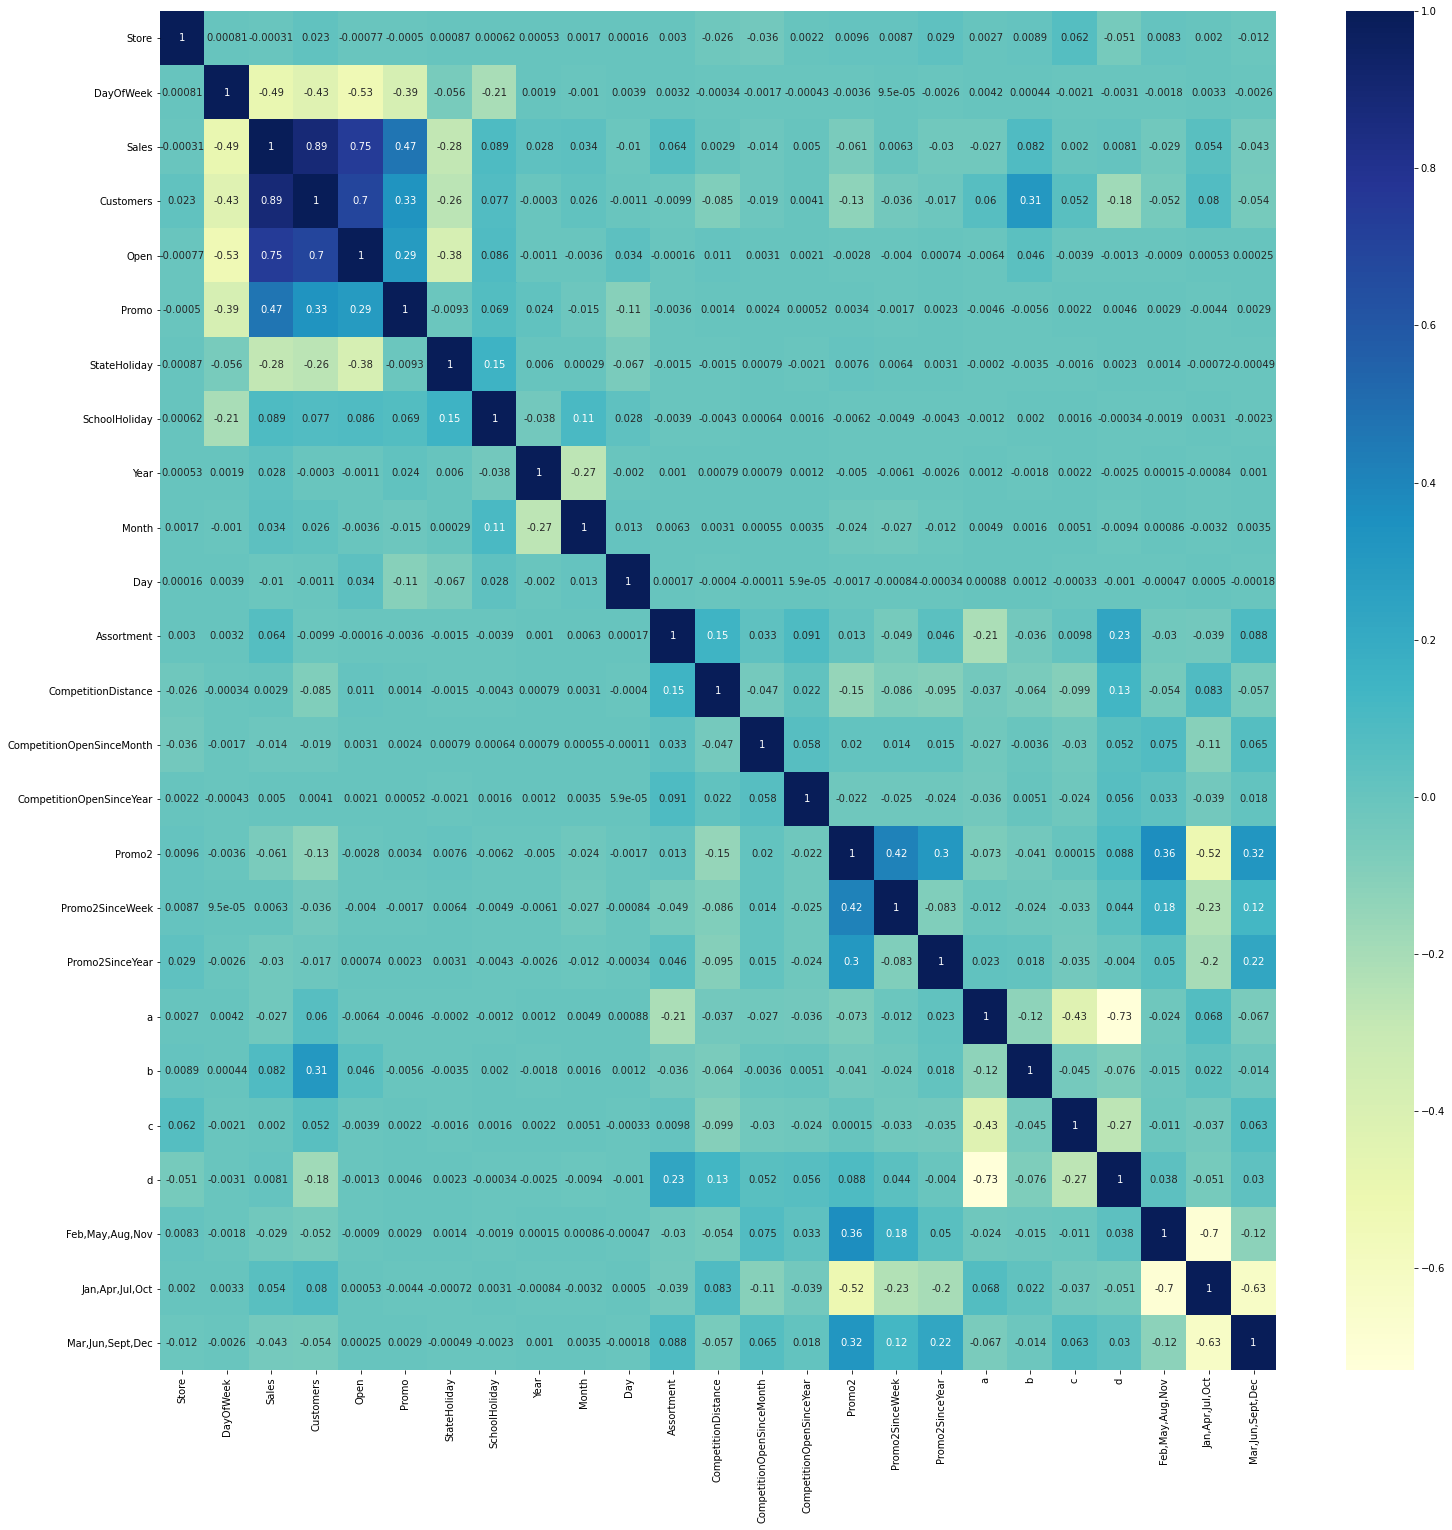

In [39]:
corrmatrix = mergedData.corr()
top_corr_features = corrmatrix.index


plt.figure(figsize = (25,25))
g=sns.heatmap(mergedData[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [ ]:
sffs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=True,
           scoring = 'r2',
           cv = 0)

### Randomized Merged Data to collect Sample

# FUNCTIONS

In [15]:
def replaceWithMode(df,col_name):
    df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
    return df

In [16]:
def LevelEncoding(df,col_name):
    labelEncoder = preprocessing.LabelEncoder()
    df[col_name] = labelEncoder.fit_transform(df[col_name])
    return df

In [17]:
def OneHotEncoding(df,col_name):
    oneHotEncoder = preprocessing.OneHotEncoder()
    encodedArray = oneHotEncoder.fit_transform(df[col_name].values.reshape(-1,1)).toarray()
    labels = oneHotEncoder.categories_
    labels = np.array(labels).ravel()
    EncodedDataFrame = pd.DataFrame(encodedArray, columns = labels)
    df = pd.concat([df,EncodedDataFrame], axis = 1)
    df = df.drop(col_name,axis = 1)
    return df

In [18]:
def findOutliers(df,col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    high_cutoff = Q3 + 1.5*IQR
    low_cutoff = Q1 - 1.5*IQR
    return high_cutoff, low_cutoff